In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mysql.connector


In [3]:
mydb=mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    use_pure=True)
mydb

In [5]:
mycursor=mydb.cursor()
mycursor

In [7]:
mycursor.execute("create database  if not exists studentsGPA")



In [9]:
mycursor.execute("use studentsGPA")

In [11]:
mycursor.execute("""
    CREATE TABLE IF NOT EXISTS studentsmarks (
        student_name VARCHAR(255),
        student_id INT PRIMARY KEY,
        age INT,
        gender VARCHAR(50),
        grade_level VARCHAR(10),
        attendance INT,
        GPA DECIMAL(3,2)
    )
""")

In [13]:
mycursor.execute("""
    INSERT INTO studentsmarks (student_name, student_id, age, gender, grade_level, attendance, GPA) 
    VALUES 
    ("Alice Johnson", 101, 16, "Female", "10", 95, 3.8),
    ("Bob Smith", 102, 17, "Male", "11", 88, 3.5),
    ("Charlie Davis", 103, 16, "Male", "10", 92, 3.9),
    ("Diana White", 104, 15, "Female", "9", 97, 4.0),
    ("Edward King", 105, 18, "Male", "12", 85, 3.2),
    ("Fiona Green", 106, 17, "Female", "11", 90, 3.7),
    ("George Brown", 107, 16, "Male", "10", 91, 3.6),
    ("Hannah Wilson", 108, 15, "Female", "9", 93, 3.9),
    ("Ian Taylor", 109, 18, "Male", "12", 87, 3.3),
    ("Julia Adams", 110, 17, "Female", "11", 89, 3.8)
""")


In [15]:
#reveal all data 
mycursor.execute("select * from studentsmarks")
mycursor.fetchall()


[('Alice Johnson', 101, 16, 'Female', '10', 95, Decimal('3.80')),
 ('Bob Smith', 102, 17, 'Male', '11', 88, Decimal('3.50')),
 ('Charlie Davis', 103, 16, 'Male', '10', 92, Decimal('3.90')),
 ('Diana White', 104, 15, 'Female', '9', 97, Decimal('4.00')),
 ('Edward King', 105, 18, 'Male', '12', 85, Decimal('3.20')),
 ('Fiona Green', 106, 17, 'Female', '11', 90, Decimal('3.70')),
 ('George Brown', 107, 16, 'Male', '10', 91, Decimal('3.60')),
 ('Hannah Wilson', 108, 15, 'Female', '9', 93, Decimal('3.90')),
 ('Ian Taylor', 109, 18, 'Male', '12', 87, Decimal('3.30')),
 ('Julia Adams', 110, 17, 'Female', '11', 89, Decimal('3.80'))]

In [17]:
mycursor.execute("select max(GPA),grade_level from studentsmarks group by grade_level")
grade_level=mycursor.fetchall()

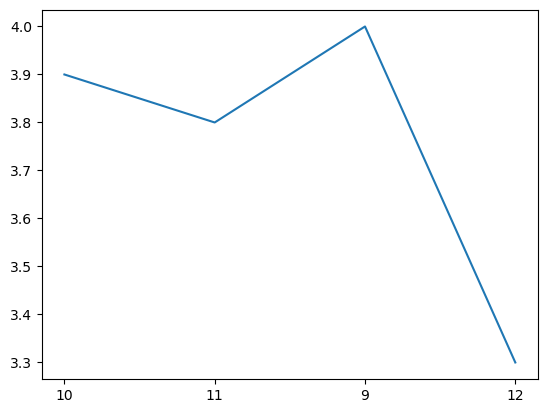

In [19]:
categorical_grade_level=np.array(grade_level)
x=categorical_grade_level[:,1]
y=categorical_grade_level[:,0]

plt.plot(x,y)
plt.show()


In [21]:
#What is the average GPA for all students in the database

mycursor.execute("select student_name,avg(GPA) from studentsmarks group by student_name")
avg=mycursor.fetchall()
avg

[('Alice Johnson', Decimal('3.800000')),
 ('Bob Smith', Decimal('3.500000')),
 ('Charlie Davis', Decimal('3.900000')),
 ('Diana White', Decimal('4.000000')),
 ('Edward King', Decimal('3.200000')),
 ('Fiona Green', Decimal('3.700000')),
 ('George Brown', Decimal('3.600000')),
 ('Hannah Wilson', Decimal('3.900000')),
 ('Ian Taylor', Decimal('3.300000')),
 ('Julia Adams', Decimal('3.800000'))]

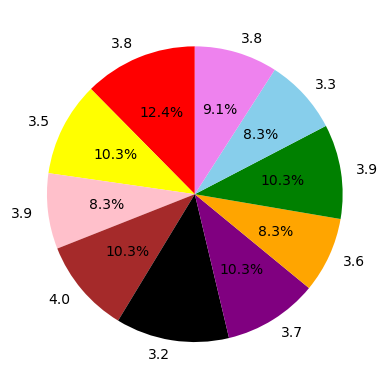

In [23]:
%matplotlib inline
avg=np.array(avg)
x=avg[:,0]
y=avg[:,1].astype(float)
sizes=[30, 25, 20, 25,30, 25, 20, 25,20,22]
plt.pie(sizes,labels=y,autopct='%1.1f%%',startangle=90,colors=['red', 'yellow', 'pink', 'brown','black', 'purple', 'orange', 'green','skyblue', 'violet'])
plt.show()

In [25]:
#How many students have not perfect attendance records
mycursor.execute("select student_name from studentsmarks where attendance<>100")
mycursor.fetchall()

[('Alice Johnson',),
 ('Bob Smith',),
 ('Charlie Davis',),
 ('Diana White',),
 ('Edward King',),
 ('Fiona Green',),
 ('George Brown',),
 ('Hannah Wilson',),
 ('Ian Taylor',),
 ('Julia Adams',)]

In [27]:
#What is the total number of students enrolled in the school
mycursor.execute("select count(*) from studentsmarks")
result=mycursor.fetchall()
result[0][0]

10

In [29]:
#who is the student of highest attendence
mycursor.execute("select student_name from studentsmarks order by attendance")
mycursor.fetchone()

('Edward King',)